In [56]:
import warnings
warnings.filterwarnings('ignore')

from pylab import *
import pyart, boto3, tempfile, os, shutil, datetime, matplotlib
import numpy as np
import pandas as pd
import pylab as pl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import animation
import netCDF4
from datetime import datetime

In [57]:
df = pd.read_csv("KLOT_20130417_RainAmounts_at_CookCountyGauges.csv")
df2 = pd.read_csv("KLOT_20130418_RainAmounts_at_CookCountyGauges.csv")
# merged = a.merge(b, on='ID')
# merged.to_csv("/home/amedendorp/Desktop/SAVUER/KLOT_Combined_RainAmounts_at_CookCountyGauges.csv", index=False)


# df = pd.read_csv("/home/amedendorp/Desktop/SAVUER/KLOT_Combined_RainAmounts_at_CookCountyGauges.csv")
# gdf = pd.DataFrame(df, columns=[df])

hp = pd.read_csv("/home/amedendorp/Downloads/WaterYear2013_hourlyprecip.csv", 
                 na_values = ['no info', '.'])

df = df.append(df2)

dates = [pd.Timestamp('2013-04-17'),
         pd.Timestamp('2013-04-18')]
ts = pd.Series(np.random.randn(2), dates)
print(df.head(5))
type(ts.index)
ts.index

   Unnamed: 0  DateTime              DateTime(UTC)                  G1  \
0           0       NaN  2013-04-17 00:04:44+00:00  0.0262604663990162   
1           0       NaN  2013-04-17 00:10:29+00:00                  --   
2           0       NaN  2013-04-17 00:16:15+00:00                  --   
3           0       NaN  2013-04-17 00:22:01+00:00                  --   
4           0       NaN  2013-04-17 00:27:46+00:00                  --   

                    G10                    G11                    G12  \
0                    --   0.005611429002549913                     --   
1   0.40505862389081787                     --  0.0020282503763834636   
2                    --  0.0006545236375596788                     --   
3                    --   0.006871307373046876   0.003959314823150635   
4  0.004079594435515227                     --   0.005588852682231385   

                     G13                   G14                    G15  ...  \
0                     --  0.0040478637

DatetimeIndex(['2013-04-17', '2013-04-18'], dtype='datetime64[ns]', freq=None)

In [58]:
df_new = df
hp_new = hp

In [59]:
df_new.index = pd.to_datetime(df['Datetime'])
hp_new.index = pd.to_datetime(hp['Date/Time'])

In [60]:
df_new = df_new.drop(labels=['Datetime'], axis=1)
hp_new = hp_new.drop(labels=['Date/Time'], axis=1)

In [61]:
df_new.index = pd.to_datetime(df_new.index)
hp_new.index = pd.to_datetime(hp_new.index)

In [62]:
df_float = df_new.convert_objects(convert_numeric=True)
hp_float = hp_new.convert_objects(convert_numeric=True)
df_float

,Unnamed: 0,DateTime,DateTime(UTC),G1,G10,G11,G12,G13,G14,G15,...,G23,G24,G25,G3,G4,G5,G6,G7,G8,G9
Datetime,,,,,,,,,,,,,,,,,,,,,
2013-04-16 19:04:44-05:00,0,NaN,2013-04-17 00:04:44+00:00,0.026260,NaN,0.005611,NaN,NaN,0.004048,0.000670,...,0.007480,0.003541,0.027808,0.001719,NaN,0.002312,0.019064,NaN,0.003078,0.005978
2013-04-16 19:10:29-05:00,0,NaN,2013-04-17 00:10:29+00:00,NaN,0.405059,NaN,0.002028,0.002871,NaN,0.002469,...,0.003020,NaN,0.003933,NaN,0.004695,0.003277,NaN,NaN,0.005949,NaN
2013-04-16 19:16:15-05:00,0,NaN,2013-04-17 00:16:15+00:00,NaN,NaN,0.000655,NaN,NaN,NaN,0.000561,...,NaN,0.007971,0.001552,NaN,NaN,NaN,0.014811,NaN,NaN,NaN
2013-04-16 19:22:01-05:00,0,NaN,2013-04-17 00:22:01+00:00,NaN,NaN,0.006871,0.003959,0.002738,NaN,0.010778,...,0.002323,NaN,NaN,NaN,0.001753,NaN,0.001881,0.007136,NaN,NaN
2013-04-16 19:27:46-05:00,0,NaN,2013-04-17 00:27:46+00:00,NaN,0.004080,NaN,0.005589,NaN,NaN,0.001067,...,NaN,NaN,NaN,NaN,0.003302,NaN,0.003359,0.005860,NaN,0.007608
2013-04-16 19:33:31-05:00,0,NaN,2013-04-17 00:33:31+00:00,NaN,NaN,0.005362,0.001257,NaN,NaN,NaN,...,NaN,NaN,0.002811,NaN,0.022468,NaN,NaN,NaN,NaN,NaN
2013-04-16 19:39:16-05:00,0,NaN,2013-04-17 00:39:16+00:00,0.004646,NaN,NaN,NaN,NaN,NaN,0.003399,...,NaN,0.003219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16 19:45:00-05:00,0,NaN,2013-04-17 00:45:00+00:00,0.002492,NaN,0.002288,NaN,NaN,NaN,0.000373,...,0.001770,0.037510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-16 19:50:48-05:00,0,NaN,2013-04-17 00:50:48+00:00,0.004207,0.002813,NaN,0.034838,NaN,NaN,0.001179,...,NaN,NaN,NaN,0.008678,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_mean = df_float.resample('1H', how='mean')
# df_new = df_mean.iloc[20:27]
df_new = df_mean *25.4

In [64]:
lines_epoch_array = np.asanyarray(df_new.index)
lines_time_array = pd.to_datetime(lines_epoch_array,  unit='s')
lines_time_array

hp_lines_epoch_array = np.asanyarray(hp.index)
hp_lines_time_array = pd.to_datetime(hp_lines_epoch_array,  unit='s')
hp_lines_time_array

DatetimeIndex(['2012-10-01 01:00:00', '2012-10-01 02:00:00',
               '2012-10-01 03:00:00', '2012-10-01 04:00:00',
               '2012-10-01 05:00:00', '2012-10-01 06:00:00',
               '2012-10-01 07:00:00', '2012-10-01 08:00:00',
               '2012-10-01 09:00:00', '2012-10-01 10:00:00',
               ...
               '2013-09-30 15:00:00', '2013-09-30 16:00:00',
               '2013-09-30 17:00:00', '2013-09-30 18:00:00',
               '2013-09-30 19:00:00', '2013-09-30 20:00:00',
               '2013-09-30 21:00:00', '2013-09-30 22:00:00',
               '2013-09-30 23:00:00', '2013-10-01 00:00:00'],
              dtype='datetime64[ns]', length=8760, freq=None)

In [65]:
df_new['time'] = lines_time_array
hp_float['time'] = hp_lines_time_array

In [66]:
hp_new = hp_float.iloc[4751:4799]
hp_new

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G22,G23,G24,G25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,time
Date/Time,,,,,,,,,,,,,,,,,,,,,
2013-04-17 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2013-04-17 00:00:00
2013-04-17 01:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2013-04-17 01:00:00
2013-04-17 02:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2013-04-17 02:00:00
2013-04-17 03:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2013-04-17 03:00:00
2013-04-17 04:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2013-04-17 04:00:00
2013-04-17 05:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2013-04-17 05:00:00
2013-04-17 06:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2013-04-17 06:00:00
2013-04-17 07:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2013-04-17 07:00:00
2013-04-17 08:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2013-04-17 08:00:00


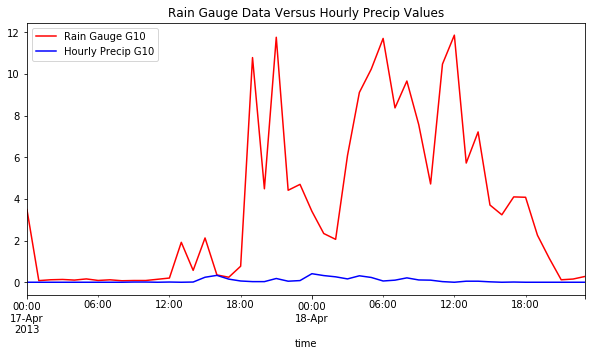

In [67]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

plt.title("Rain Gauge Data Versus Hourly Precip Values")
df_new.plot(x='time', y="G10", label="Rain Gauge" + " G10", color='red', ax=ax1)
hp_new.plot(x='time', y="G10", label="Hourly Precip" + " G10", color='blue', ax=ax1 )

<Figure size 1152x576 with 0 Axes>

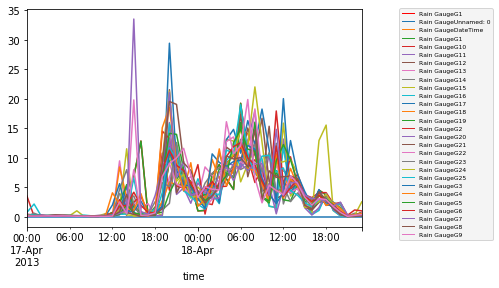

In [68]:
col_names = list(df_mean.columns.values)

fig = plt.figure(figsize=(16, 8))
ax = df_new.plot(x='time', y="G1", label="Rain Gauge" + "G1", color='red')
for i in col_names:
    df_new.plot(x='time', y=i, label="Rain Gauge" + i, ax=ax)
legend = plt.legend(bbox_to_anchor=(1.4, 1.017), prop={'size': 6})
legend.get_frame().set_facecolor('#f2f2f2')
for legobj in legend.legendHandles:
    legobj.set_linewidth(1.0)
plt.show()